In [45]:
# import required modules for this project

import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Graduation Dataset Overview**

In [3]:
# Load csv file
graduation = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/Education-Capstone/data/2023-graduation-rates-public-borough.csv')

In [4]:
# print out the first 5 rows of data
graduation.head()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Bronx,All Students,2019,4 year August,12256,9733,79.4,9678,79.0,99.4,...,0.4,0.6,1381,11.3,957,7.8,74,0.6,91,0.7
1,Bronx,All Students,2018,4 year August,12487,9921,79.5,9874,79.1,99.5,...,0.4,0.5,1400,11.2,974,7.8,95,0.8,87,0.7
2,Bronx,All Students,2017,4 year August,13152,10220,77.7,10136,77.1,99.2,...,0.6,0.8,1761,13.4,1001,7.6,54,0.4,98,0.7
3,Bronx,All Students,2016,4 year August,13421,9938,74.0,9733,72.5,97.9,...,1.5,2.1,1976,14.7,1271,9.5,60,0.4,175,1.3
4,Bronx,All Students,2015,4 year August,13891,9752,70.2,8446,60.8,86.6,...,9.4,13.4,2124,15.3,1759,12.7,80,0.6,175,1.3


Opened data wrangler. 2,899 rows x 27 columns. Will explore value counts for categorical variables. Will calculate graduation year using cohort and cohort and cohort year. Will focus strictly on graduation variables. 

In [8]:
# Print out general information on this dataframe
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Borough                               2899 non-null   object
 1   Category                              2899 non-null   object
 2   Cohort Year                           2899 non-null   object
 3   Cohort                                2899 non-null   object
 4   # Total Cohort                        2899 non-null   object
 5   # Grads                               2899 non-null   object
 6   % Grads                               2899 non-null   object
 7   # Total Regents                       2899 non-null   object
 8   % Total Regents of Cohort             2899 non-null   object
 9   % Total Regents of Grads              2899 non-null   object
 10  # Advanced Regents                    2899 non-null   object
 11  % Advanced Regents of Cohort  

Might change data types

In [6]:
graduation.describe()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
count,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899,...,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899
unique,6,18,9,6,1462,2286,550,2289,613,357,...,245,357,1183,350,1075,310,260,93,221,59
top,Bronx,All Students,2017,4 year August,17,s,s,s,s,100.0,...,0.3,0.0,7,5.0,9,5.2,0,0.0,0,0.8
freq,580,180,400,645,11,24,24,24,24,141,...,152,141,43,33,44,38,399,502,169,242


Most cohort data is centered on August 2017, with most 4-years long. There might be some supressed data. Will delete those rows. Most frequent drop out rate is 5.2%. Might rid some diploma columns due to low frequencies.

In [7]:
graduation.isnull().sum()

Borough                                 0
Category                                0
Cohort Year                             0
Cohort                                  0
# Total Cohort                          0
# Grads                                 0
% Grads                                 0
# Total Regents                         0
% Total Regents of Cohort               0
% Total Regents of Grads                0
# Advanced Regents                      0
% Advanced Regents of Cohort            0
% Advanced Regents of Grads             0
# Regents without Advanced              0
% Regents without Advanced of Cohort    0
% Regents without Advanced of Grads     0
# Local                                 0
% Local of Cohort                       0
% Local of Grads                        0
# Still Enrolled                        0
% Still Enrolled                        0
# Dropout                               0
% Dropout                               0
# SACC (IEP Diploma)              

In [10]:
# Dropped suppressed data

rows_to_drop = graduation.isin(['s']).any(axis=1)
graduation = graduation[~rows_to_drop]
graduation.describe()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
count,2875,2875,2875,2875,2875,2875,2875,2875,2875,2875,...,2875,2875,2875,2875,2875,2875,2875,2875,2875,2875
unique,6,18,9,6,1453,2285,549,2288,612,356,...,244,356,1182,349,1074,309,259,92,220,58
top,Manhattan,All Students,2017,4 year August,17,61,88.6,23,84.8,100.0,...,0.3,0.0,7,3.4,9,5.2,0,0.0,0,0.8
freq,578,180,400,637,11,10,20,10,20,141,...,152,141,43,33,44,38,399,502,169,242


In [19]:
graduation['Category'].value_counts()

Category
All Students               180
Black                      180
Econ Disadv                180
Male                       180
White                      180
Native American            180
Multi-Racial               180
Hispanic                   180
Asian                      180
SWD                        180
Not SWD                    180
Not ELL                    180
Former ELL                 180
ELL                        180
Not Econ Disadv            180
Female                     168
Category                     5
Neither Female nor Male      2
Name: count, dtype: int64

In [22]:
# Dropped "Category" rows
more_rows_to_drop = graduation.isin(['Category']).any(axis=1)
graduation = graduation[~more_rows_to_drop]
graduation.describe()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
count,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,...,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870
unique,5,17,8,5,1452,2284,548,2287,611,355,...,243,355,1181,348,1073,308,258,91,219,57
top,Manhattan,All Students,2017,4 year August,17,61,76.5,23,84.8,100.0,...,0.3,0.0,7,3.4,9,5.2,0,0.0,0,0.8
freq,578,180,400,637,11,10,20,10,20,141,...,152,141,43,33,44,38,399,502,169,242


In [20]:
graduation['Borough'].value_counts()

Borough
Manhattan        578
Queens           574
Staten Island    574
Bronx            572
Brooklyn         572
Borough            5
Name: count, dtype: int64

In [21]:
graduation['Cohort Year'].value_counts()

Cohort Year
2017           400
2016           400
2015           400
2014           400
2013           400
2012           400
2018           316
2019           154
Cohort Year      5
Name: count, dtype: int64

In [24]:
# Ensure 'Cohort Year' is an integer type.
graduation['Cohort Year'] = pd.to_numeric(graduation['Cohort Year'], errors='coerce').fillna(0).astype(int)

# Extract the number from the 'Cohort' string directly using vectorized operations.
extracted_years = pd.to_numeric(
    graduation['Cohort'].str.extract(r'(\d+)', expand=False),
    errors='coerce'
).fillna(0).astype(int)

# Add the 'Cohort Year' column (now guaranteed int) and the 'extracted_years' Series (guaranteed int)to create the new 'Graduation Year' column.
graduation['Graduation Year'] = graduation['Cohort Year'] + extracted_years
graduation

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort,Graduation Year
0,Bronx,All Students,2019,4 year August,12256,9733,79.4,9678,79.0,99.4,...,0.6,1381,11.3,957,7.8,74,0.6,91,0.7,2023
1,Bronx,All Students,2018,4 year August,12487,9921,79.5,9874,79.1,99.5,...,0.5,1400,11.2,974,7.8,95,0.8,87,0.7,2022
2,Bronx,All Students,2017,4 year August,13152,10220,77.7,10136,77.1,99.2,...,0.8,1761,13.4,1001,7.6,54,0.4,98,0.7,2021
3,Bronx,All Students,2016,4 year August,13421,9938,74.0,9733,72.5,97.9,...,2.1,1976,14.7,1271,9.5,60,0.4,175,1.3,2020
4,Bronx,All Students,2015,4 year August,13891,9752,70.2,8446,60.8,86.6,...,13.4,2124,15.3,1759,12.7,80,0.6,175,1.3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.4,1847,93.2,98.7,...,1.3,19,1.0,71,3.6,3,0.2,17,0.9,2022
2895,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.3,1559,83.4,90.3,...,9.7,41,2.2,77,4.1,3,0.2,23,1.2,2021
2896,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.8,1646,81.4,90.6,...,9.4,52,2.6,125,6.2,6,0.3,23,1.1,2020
2897,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.8,1810,80.9,91.2,...,8.8,56,2.5,150,6.7,11,0.5,34,1.5,2019


In [39]:
graduation['% Grads'] = pd.to_numeric(graduation['% Grads'], errors='coerce')

**Univariate Analysis**

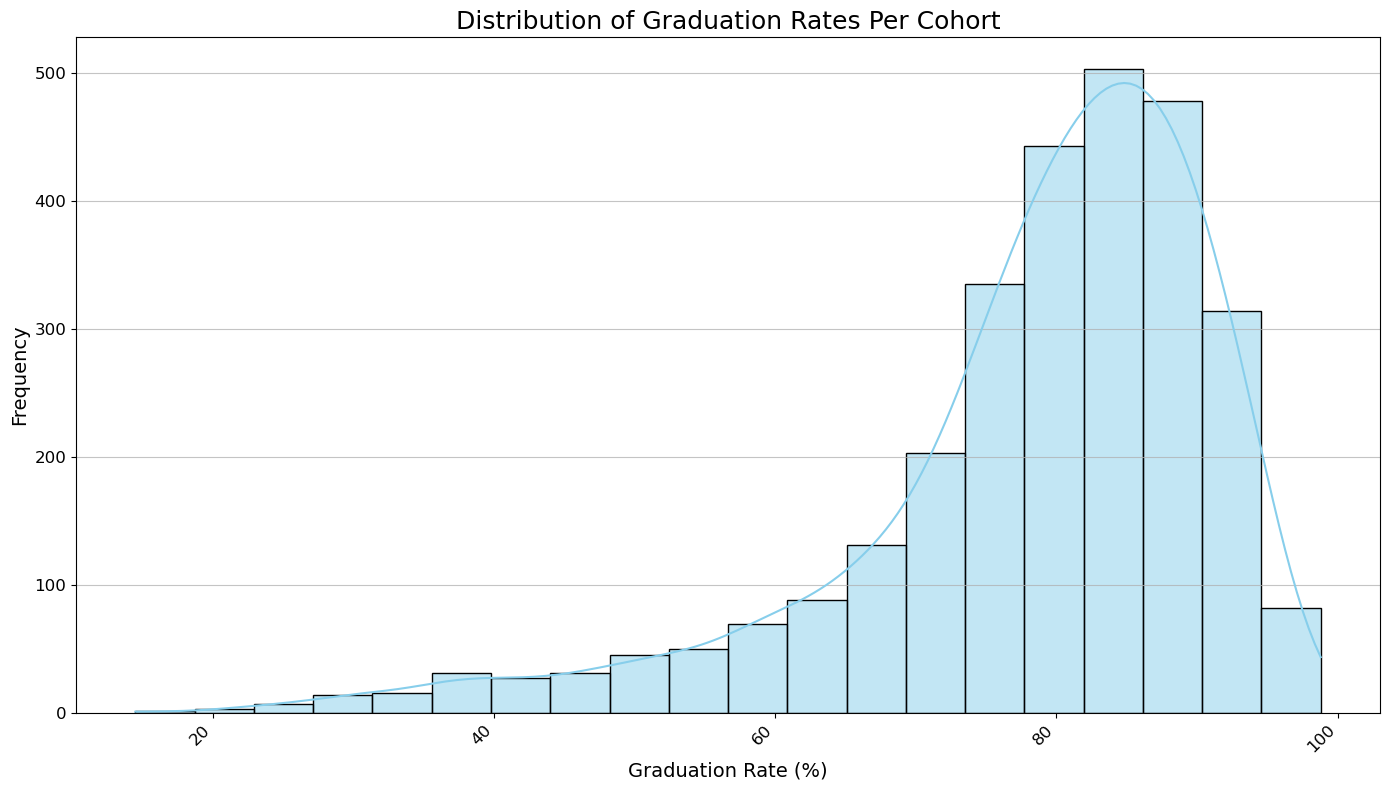

In [42]:
# Distribution of % Grads
plt.figure(figsize=(14, 8))
sns.histplot(graduation['% Grads'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Graduation Rates Per Cohort', fontsize=18)
plt.xlabel('Graduation Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Left skew. Most frequent graduation rate above 80%. None are 100% across the data.

In [46]:
# Rename the 'Cohort' column to 'Cohort Duration'
graduation.rename(columns={'Cohort': 'Cohort Duration'}, inplace=True)

# Apply a lambda function to extract the number directly from the 'Cohort Duration' column
graduation['Cohort Duration'] = graduation['Cohort Duration'].apply(
    lambda text: int(re.match(r'(\d+)', text).group(1)) if re.match(r'(\d+)', text) else None
)

graduation

,Borough,Category,Cohort Year,Cohort Duration,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort,Graduation Year
0,Bronx,All Students,2019,4,12256,9733,79.4,9678,79.0,99.4,...,0.6,1381,11.3,957,7.8,74,0.6,91,0.7,2023
1,Bronx,All Students,2018,4,12487,9921,79.5,9874,79.1,99.5,...,0.5,1400,11.2,974,7.8,95,0.8,87,0.7,2022
2,Bronx,All Students,2017,4,13152,10220,77.7,10136,77.1,99.2,...,0.8,1761,13.4,1001,7.6,54,0.4,98,0.7,2021
3,Bronx,All Students,2016,4,13421,9938,74.0,9733,72.5,97.9,...,2.1,1976,14.7,1271,9.5,60,0.4,175,1.3,2020
4,Bronx,All Students,2015,4,13891,9752,70.2,8446,60.8,86.6,...,13.4,2124,15.3,1759,12.7,80,0.6,175,1.3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Staten Island,Not Econ Disadv,2016,6,1981,1871,94.4,1847,93.2,98.7,...,1.3,19,1.0,71,3.6,3,0.2,17,0.9,2022
2895,Staten Island,Not Econ Disadv,2015,6,1870,1726,92.3,1559,83.4,90.3,...,9.7,41,2.2,77,4.1,3,0.2,23,1.2,2021
2896,Staten Island,Not Econ Disadv,2014,6,2022,1816,89.8,1646,81.4,90.6,...,9.4,52,2.6,125,6.2,6,0.3,23,1.1,2020
2897,Staten Island,Not Econ Disadv,2013,6,2236,1985,88.8,1810,80.9,91.2,...,8.8,56,2.5,150,6.7,11,0.5,34,1.5,2019


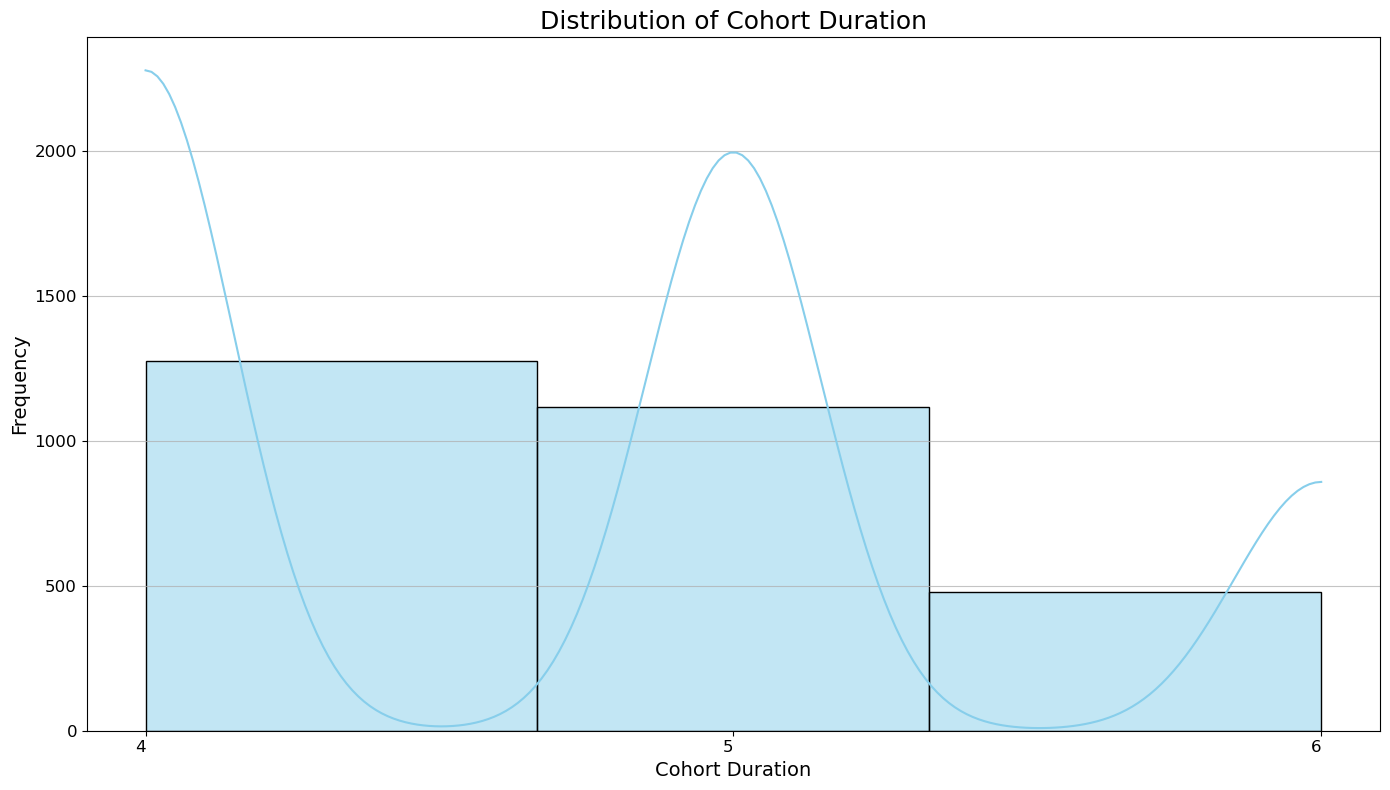

In [51]:
# Distribution of Cohort Duration
plt.figure(figsize=(14, 8))
sns.histplot(graduation['Cohort Duration'], kde=True, bins=3, color='skyblue')
plt.title('Distribution of Cohort Duration', fontsize=18)
plt.xlabel('Cohort Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([4, 5, 6], ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Most cohorts are four years. Will explore over time and maybe by boroughs.

In [53]:
graduation['# Total Cohort'] = graduation['# Total Cohort'].astype(int)

In [54]:
graduation.describe()

,Cohort Year,Cohort Duration,# Total Cohort,% Grads,Graduation Year
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000
mean,2015.126829,4.723345,5469.655749,78.405226,2019.850174
std,2.117318,0.731299,5377.402514,13.296741,2.119272
min,2012.000000,4.000000,7.000000,14.500000,2016.000000
25%,2013.000000,4.000000,1157.000000,73.600000,2018.000000
50%,2015.000000,5.000000,3474.000000,81.600000,2020.000000
75%,2017.000000,5.000000,8772.750000,87.500000,2022.000000
max,2019.000000,6.000000,20823.000000,98.800000,2023.000000


Average cohort size is over 5000 students

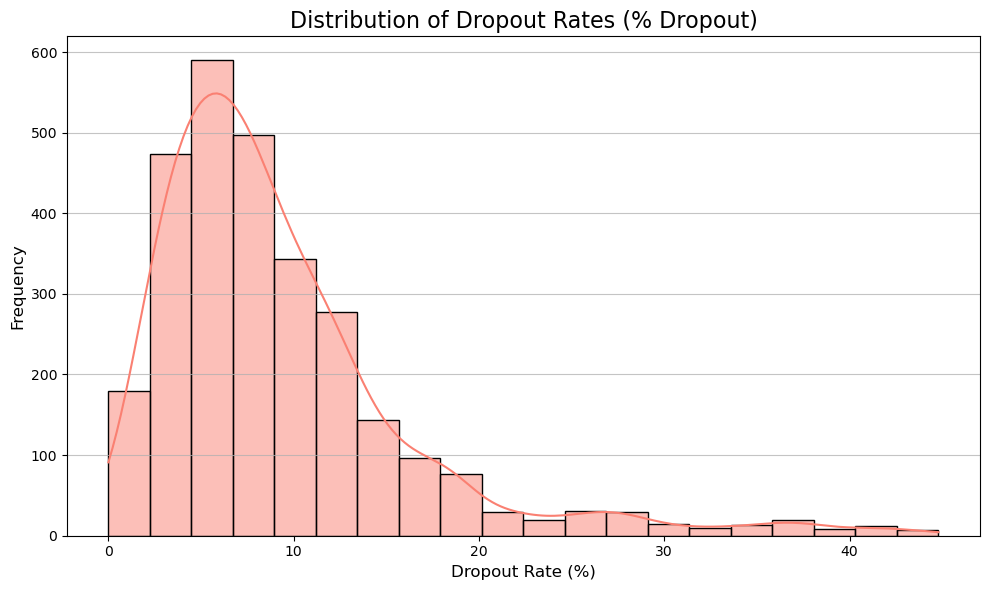

In [56]:
graduation['% Dropout'] = pd.to_numeric(graduation['% Dropout'], errors='coerce')
# Distribution of % Dropout
plt.figure(figsize=(10, 6))
sns.histplot(graduation['% Dropout'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Dropout Rates (% Dropout)', fontsize=16)
plt.xlabel('Dropout Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Dropout rate has an average of 9%. Some cohorts had as high as 44%! Will explore this further.

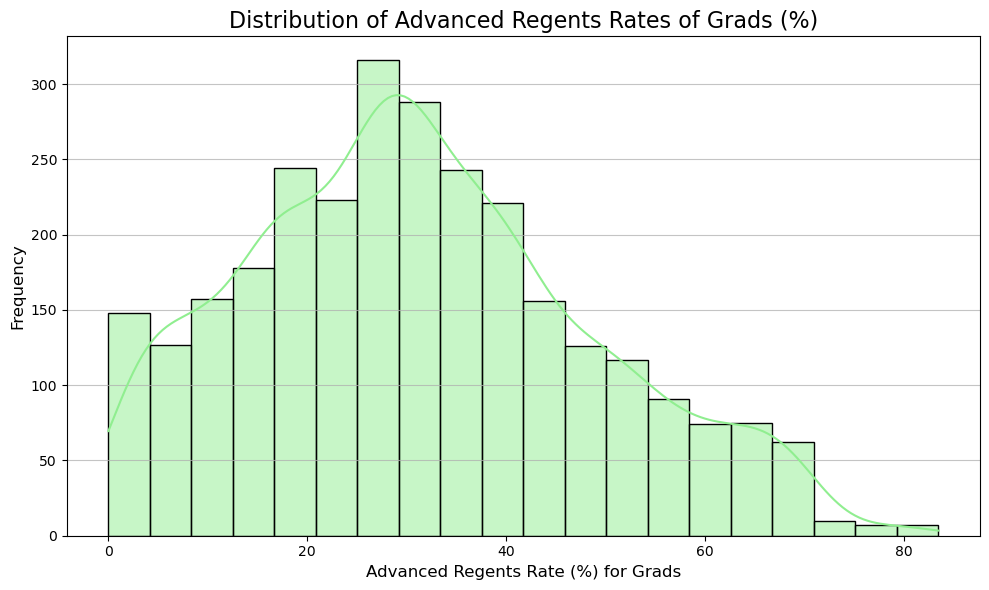

In [62]:
graduation['% Advanced Regents of Cohort'] = pd.to_numeric(graduation['% Advanced Regents of Cohort'], errors='coerce')
graduation['% Advanced Regents of Grads'] = pd.to_numeric(graduation['% Advanced Regents of Grads'], errors='coerce')
# Distribution of % Advanced Regents of Cohort
plt.figure(figsize=(10, 6))
sns.histplot(graduation['% Advanced Regents of Grads'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Advanced Regents Rates of Grads (%)', fontsize=16)
plt.xlabel('Advanced Regents Rate (%) for Grads', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Average % of Advanced Regents overall was 31% for grads

In [64]:
graduation.describe()

,Cohort Year,Cohort Duration,# Total Cohort,% Grads,% Advanced Regents of Cohort,% Advanced Regents of Grads,% Dropout,Graduation Year
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000
mean,2015.126829,4.723345,5469.655749,78.405226,26.092195,31.220348,9.331812,2019.850174
std,2.117318,0.731299,5377.402514,13.296741,16.330462,17.296064,7.132982,2.119272
min,2012.000000,4.000000,7.000000,14.500000,0.000000,0.000000,0.000000,2016.000000
25%,2013.000000,4.000000,1157.000000,73.600000,13.125000,18.100000,4.700000,2018.000000
50%,2015.000000,5.000000,3474.000000,81.600000,24.400000,29.700000,7.500000,2020.000000
75%,2017.000000,5.000000,8772.750000,87.500000,36.200000,41.900000,11.600000,2022.000000
max,2019.000000,6.000000,20823.000000,98.800000,77.800000,83.500000,44.800000,2023.000000


**Bivariate Analysis**

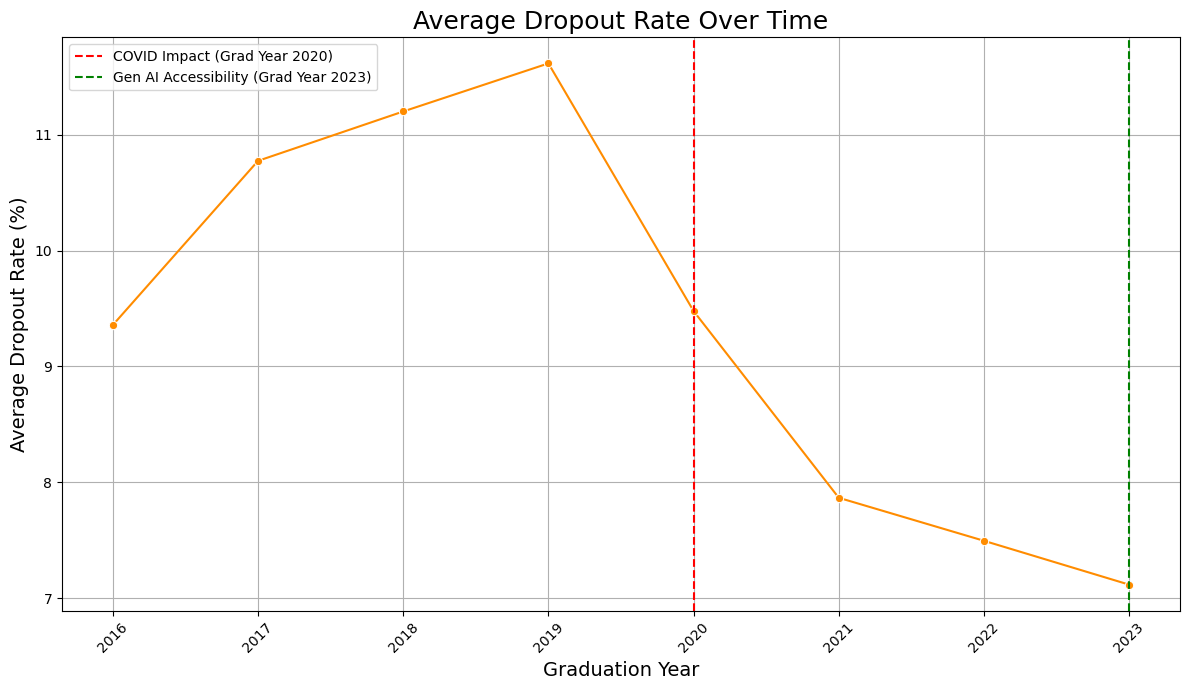

In [65]:
# Average % Dropout over Graduation Year
dropout_year_trends = graduation.groupby('Graduation Year')['% Dropout'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=dropout_year_trends, x='Graduation Year', y='% Dropout', marker='o', color='darkorange')
plt.title('Average Dropout Rate Over Time', fontsize=18)
plt.xlabel('Graduation Year', fontsize=14)
plt.ylabel('Average Dropout Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.axvline(x=2020, color='red', linestyle='--', label='COVID Impact (Grad Year 2020)')
plt.axvline(x=2023, color='green', linestyle='--', label='Gen AI Accessibility (Grad Year 2023)')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Very interesting insight. Average Dropout Rate percentages shows decrease over time. Will need to investigate more.

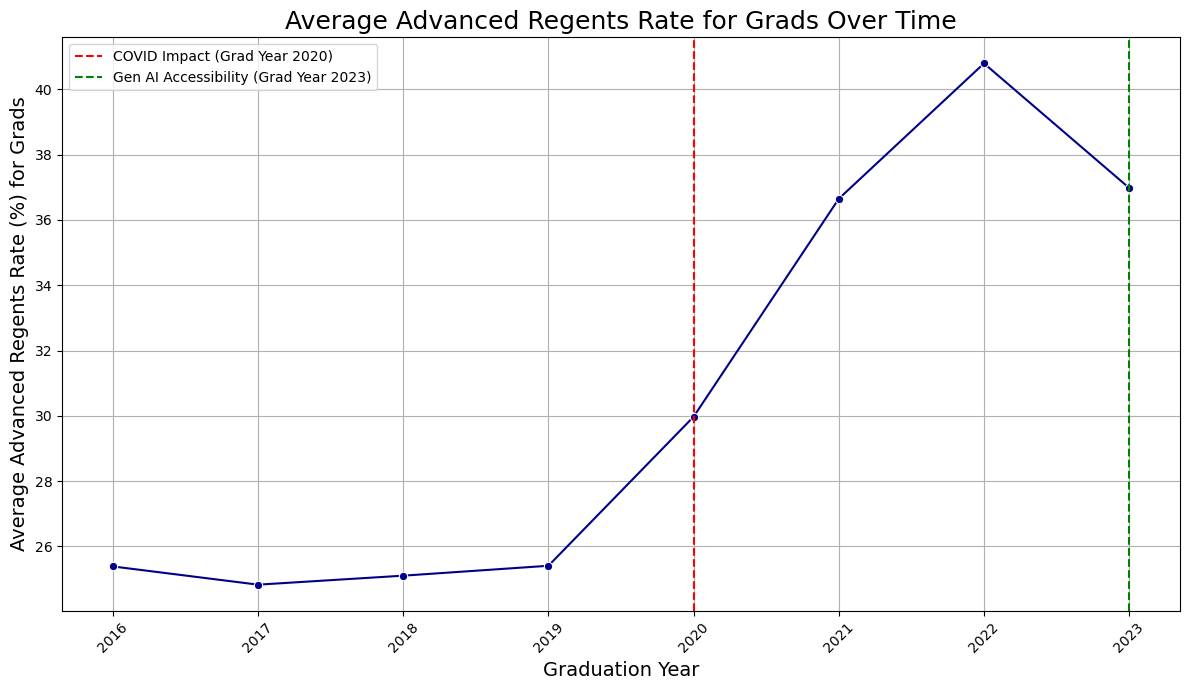

In [66]:
# Average % Advanced Regents of Grads over Graduation Year
adv_regents_year_trends = graduation.groupby('Graduation Year')['% Advanced Regents of Grads'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=adv_regents_year_trends, x='Graduation Year', y='% Advanced Regents of Grads', marker='o', color='darkblue')
plt.title('Average Advanced Regents Rate for Grads Over Time', fontsize=18)
plt.xlabel('Graduation Year', fontsize=14)
plt.ylabel('Average Advanced Regents Rate (%) for Grads', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.axvline(x=2020, color='red', linestyle='--', label='COVID Impact (Grad Year 2020)')
plt.axvline(x=2023, color='green', linestyle='--', label='Gen AI Accessibility (Grad Year 2023)')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

I wonder what explains this trend. I find the decrease in 2023 to be especially interesting. Will need to investigate

/var/folders/09/b7d153cx51x9h9tv6nflc5th0000gn/T/ipykernel_2496/4232777730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=graduation, x='Category', y='% Grads', palette='viridis', errorbar=None) # errorbar=None to remove confidence intervals


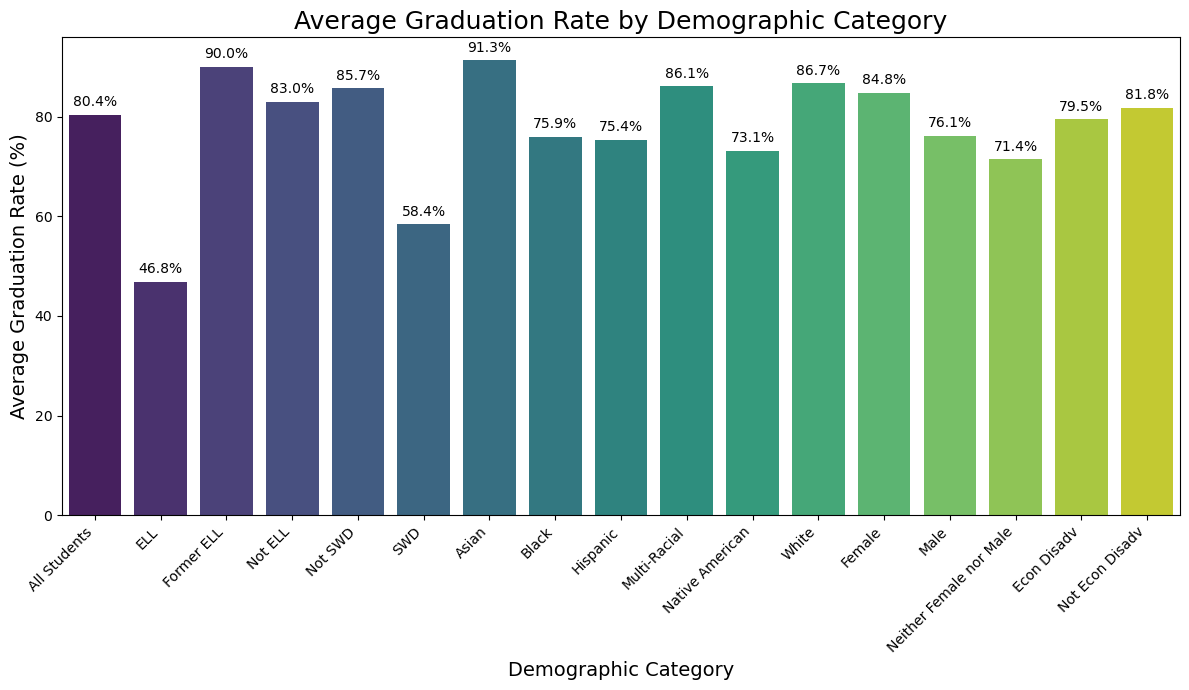

In [69]:
# Average % Grads by Demographic Category
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=graduation, x='Category', y='% Grads', palette='viridis', errorbar=None) # errorbar=None to remove confidence intervals
plt.title('Average Graduation Rate by Demographic Category', fontsize=18)
plt.xlabel('Demographic Category', fontsize=14)
plt.ylabel('Average Graduation Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
# Add percentage labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                color='black')
plt.tight_layout()
plt.show()

A lot of insights in this graph. I find the ELL status graduation trends to be interesting. Former ELL has the second highest graduation rate. Economic diversity doesn't seem to have much of a graduation gap. The lowest graduation rate groups are students with disabilities and and English Language Learners.

/var/folders/09/b7d153cx51x9h9tv6nflc5th0000gn/T/ipykernel_2496/2754381271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=graduation, x='Category', y='% Dropout', palette='magma', errorbar=None)


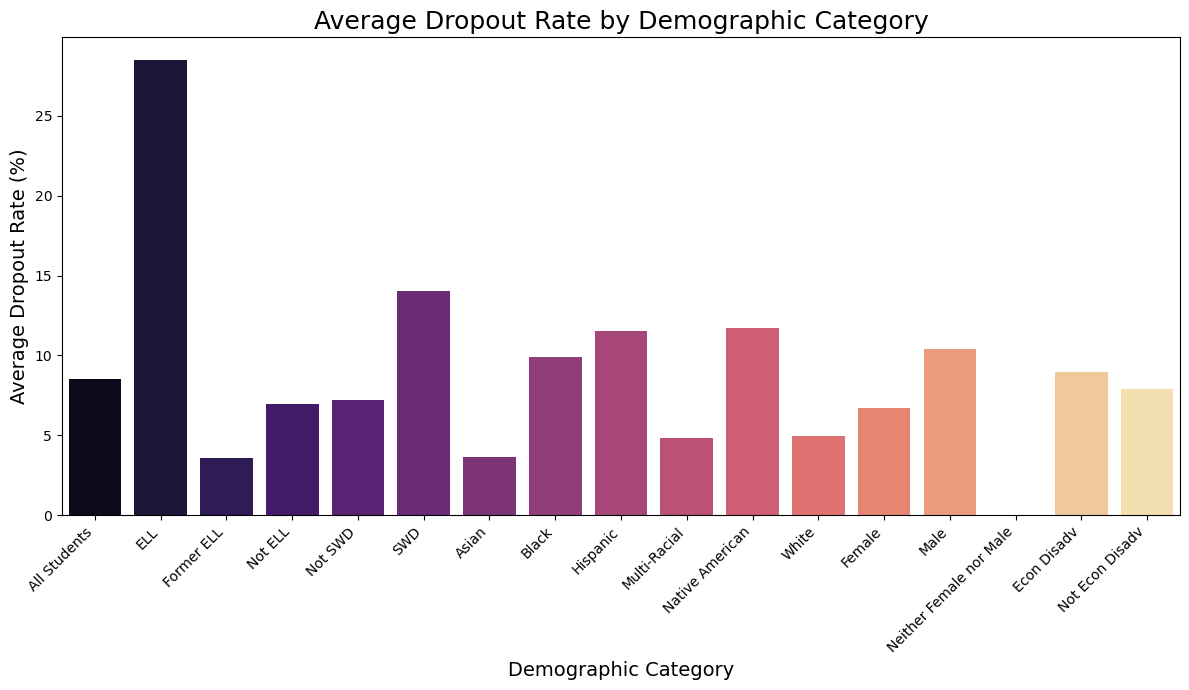

In [70]:
# Average % Dropout by Demographic Category
plt.figure(figsize=(12, 7))
sns.barplot(data=graduation, x='Category', y='% Dropout', palette='magma', errorbar=None)
plt.title('Average Dropout Rate by Demographic Category', fontsize=18)
plt.xlabel('Demographic Category', fontsize=14)
plt.ylabel('Average Dropout Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Similar trends as previous graph

**Transformations Summary** 

For the graduation dataset, I completed the following transformations;
1. Dropped suppressed data to further support the Family Educational Rights and Privacy Act (FERPA) and be able to analyze the numerical columns.
2. Dropped 5 rows that didn't include any additional data
3. Created Graduation Year column
4. Datatype conversions for visuals since a lot of the original data types were object
5. Created Cohort Duration column
